In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Carga del dataset
boston = pd.read_csv("/BostonHousing.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
#Cantidad de valores nulos
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [30]:
#Eliminación nulos
boston.dropna(inplace = True)

In [32]:
#Selección de las variables independientes y objetivo
X_multiple = boston.iloc[:, 5:8] # Se seleccionan las columnas 5, 6 y 7
y = boston["MEDV"]

In [35]:
#Separación de los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2)

In [36]:
#Selección del algoritmo a utilizar
modelo = LinearRegression()

In [37]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_multiple = modelo.predict(X_test)

numpy.ndarray

In [65]:
y_res = pd.DataFrame({"precio_prueba":y_test, "precio_pred":y_pred_multiple})
comparativa = pd.concat([X_test, y_res], axis = 1)
comparativa_ord = comparativa.sort_values(by="precio_prueba")
comparativa_ord.reset_index(drop = True, inplace = True)
comparativa_ord

,RM,AGE,DIS,precio_prueba,precio_pred
0,5.093,98.0,1.8226,8.1,9.785373
1,5.896,95.4,1.9096,8.3,16.658879
2,4.368,91.2,1.4395,8.8,4.717020
3,6.461,93.3,2.0026,9.6,21.513860
4,4.903,97.8,1.3459,11.8,8.417557
...,...,...,...,...,...
74,7.016,97.5,1.2024,50.0,25.907183
75,7.929,96.2,2.0459,50.0,33.263713
76,6.216,100.0,1.1691,50.0,19.049925
77,7.875,32.0,5.6484,50.0,38.699178


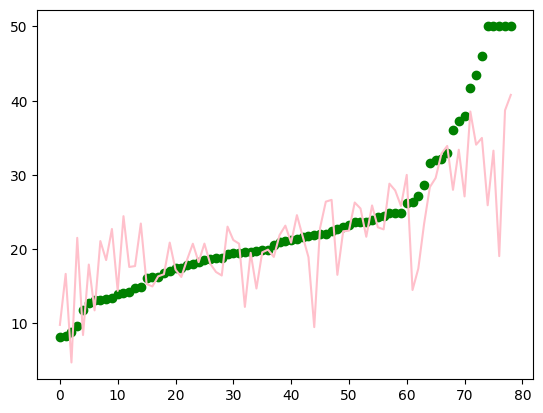

In [75]:
plt.scatter(list(comparativa_ord.index), comparativa_ord.iloc[:,3], color = 'g')
plt.plot(list(comparativa_ord.index), comparativa_ord.iloc[:,4], color = 'pink')

plt.show()

In [79]:
#Valores de la pendiente e intersección
pendiente = modelo.coef_
intercep = modelo.intercept_
print("Pendiente:", pendiente)
print("Intercepción:", intercep)

Pendiente: [ 8.23634784 -0.11215204 -0.36639366]
Intercepción: -20.50365754448381


Devuelve 3 valoes de pendiente, ya que se está usando 3 variables independientes

In [80]:
#Precisión del algoritmo
print(f"Precisión del modelo: {modelo.score(X_train, y_train)}")

Precisión del modelo: 0.5947279469171896
